In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("loan_ap.csv")
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
255,LP001846,Female,No,3+,Graduate,No,3083,0.0,255.0,360.0,1.0,Rural,Y
39,LP001116,Male,No,0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban,Y
92,LP001319,Male,Yes,2,Not Graduate,No,3273,1820.0,81.0,360.0,1.0,Urban,Y
439,LP002407,Female,Yes,0,Not Graduate,Yes,7142,0.0,138.0,360.0,1.0,Rural,Y


In [3]:
df.shape

(614, 13)

# Drop Loan_ID

In [4]:
df.drop("Loan_ID",axis=1,inplace=True)

# Missing Values

In [5]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [7]:
numcol=[]
catcol=[]
for i in df.columns:
    if df[i].dtype=='O':
        catcol.append(i)
    else:
        numcol.append(i)

In [8]:
numcol=numcol[:-2]
numcol

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [9]:
for i in numcol:
    print(i,df[i].nunique())

ApplicantIncome 505
CoapplicantIncome 287
LoanAmount 203


In [10]:
catcol.append('Credit_History')
catcol.append('Loan_Amount_Term')
catcol

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status',
 'Credit_History',
 'Loan_Amount_Term']

In [11]:
for i in catcol:
    print(i,df[i].nunique())

Gender 2
Married 2
Dependents 4
Education 2
Self_Employed 2
Property_Area 3
Loan_Status 2
Credit_History 2
Loan_Amount_Term 10


In [12]:
for i in numcol:
    df[i].fillna(df[i].mean(), inplace=True)

In [13]:
for i in catcol:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [14]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
265,Male,No,0,Graduate,No,4095,3447.0,151.0,360.0,1.0,Rural,Y
242,Male,No,0,Graduate,No,2965,5701.0,155.0,60.0,1.0,Urban,Y
36,Male,Yes,0,Graduate,No,1828,1330.0,100.0,360.0,0.0,Urban,N
522,Male,Yes,3+,Graduate,Yes,5677,1424.0,100.0,360.0,1.0,Rural,Y
194,Male,No,0,Graduate,No,4191,0.0,120.0,360.0,1.0,Rural,Y


In [16]:
df.shape

(614, 12)

In [17]:
df.drop_duplicates()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [18]:
for i in catcol:
    print(i,":",df[i].unique())

Gender : ['Male' 'Female']
Married : ['No' 'Yes']
Dependents : ['0' '1' '2' '3+']
Education : ['Graduate' 'Not Graduate']
Self_Employed : ['No' 'Yes']
Property_Area : ['Urban' 'Rural' 'Semiurban']
Loan_Status : ['Y' 'N']
Credit_History : [1. 0.]
Loan_Amount_Term : [360. 120. 240. 180.  60. 300. 480.  36.  84.  12.]


# EDA

Text(0.5, 1.0, 'Gender vs Loan Status')

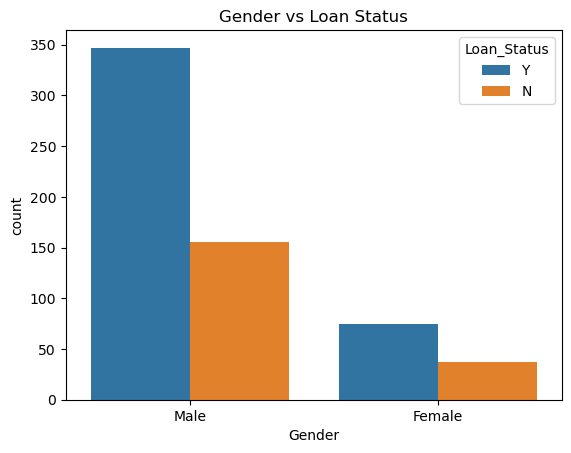

In [19]:
sns.countplot(data=df, x='Gender', hue='Loan_Status')
plt.title('Gender vs Loan Status')

Text(0.5, 1.0, 'Education vs Loan Status')

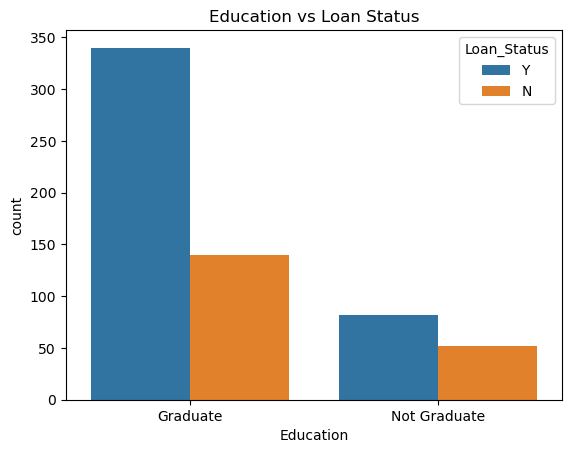

In [20]:
sns.countplot(data=df, x='Education', hue='Loan_Status')
plt.title('Education vs Loan Status')

Text(0.5, 1.0, 'Self_Employed vs Loan Status')

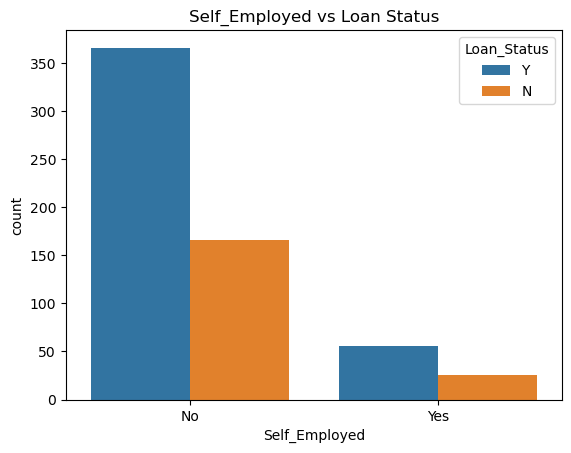

In [21]:
sns.countplot(data=df, x='Self_Employed', hue='Loan_Status')
plt.title('Self_Employed vs Loan Status')

In [22]:
print("len is :",df.shape[0])
print((df["Loan_Status"].value_counts()[0]/df.shape[0])*100)
print((df["Loan_Status"].value_counts()[1]/df.shape[0])*100)

len is : 614
68.72964169381108
31.27035830618892


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15796\812929569.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print((df["Loan_Status"].value_counts()[0]/df.shape[0])*100)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15796\812929569.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print((df["Loan_Status"].value_counts()[1]/df.shape[0])*100)


In [23]:
numcol

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

ApplicantIncome


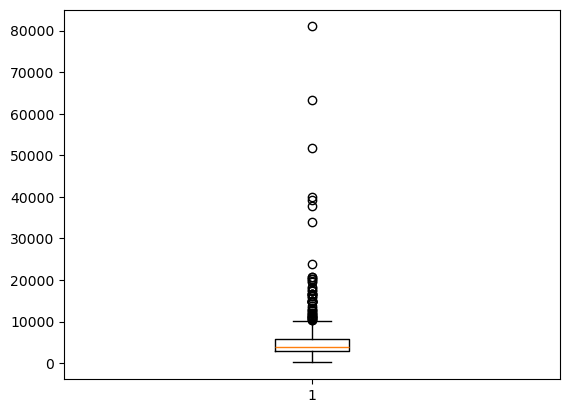

CoapplicantIncome


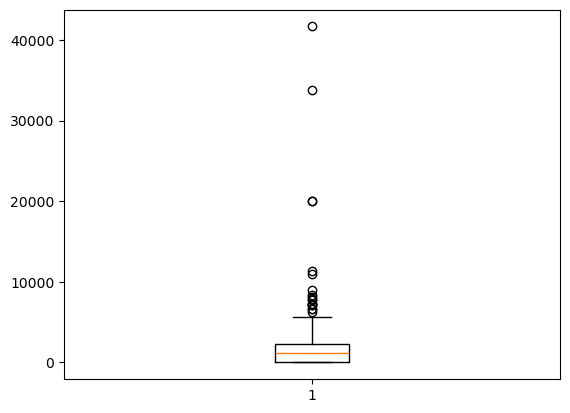

LoanAmount


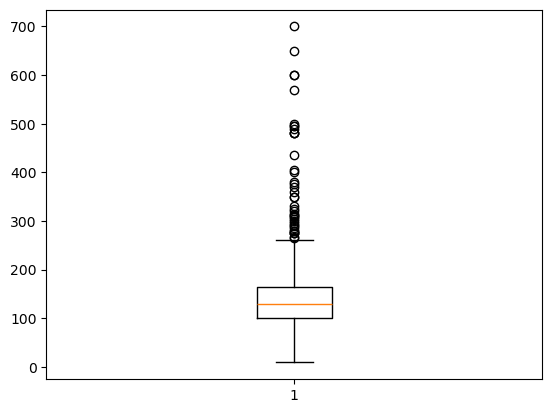

In [24]:
for i in numcol:
    print(i)
    plt.boxplot(df[i])
    plt.show()

ApplicantIncome


C:\Users\ADMIN\Documents\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


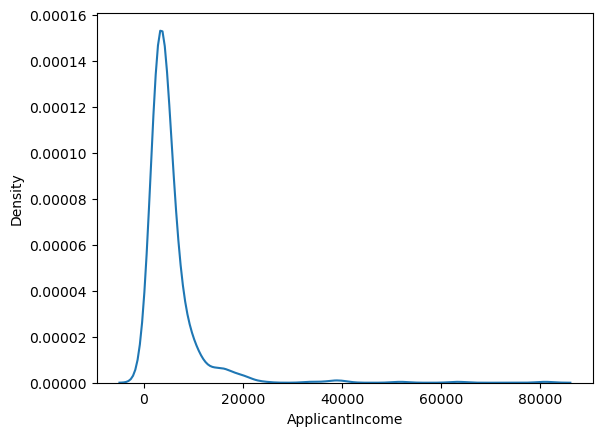

CoapplicantIncome


C:\Users\ADMIN\Documents\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


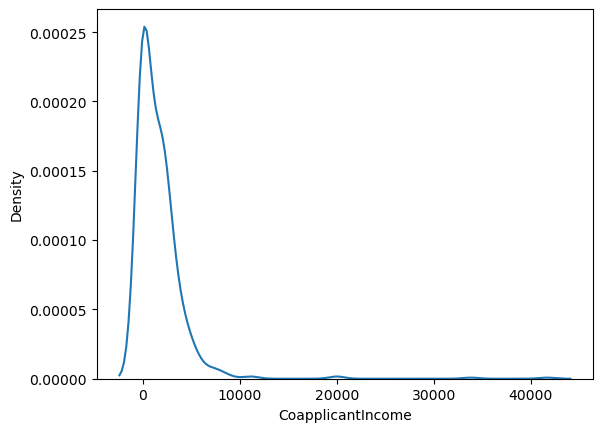

LoanAmount


C:\Users\ADMIN\Documents\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


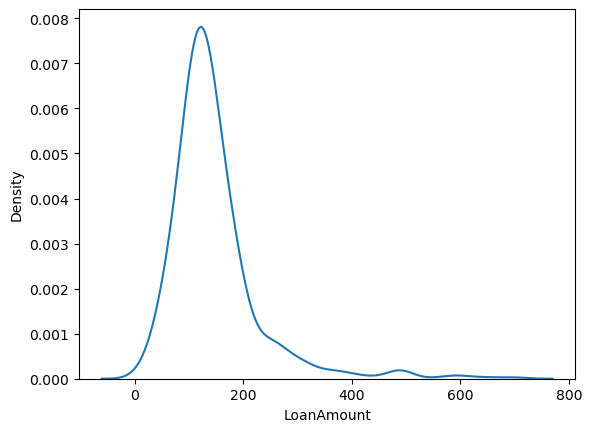

In [25]:
for i in numcol:
    print(i)
    sns.kdeplot(df[i])
    plt.show()

# How to remove outlier

In [26]:
for i in numcol:
    q25=np.percentile(df[i],25)
    q75=np.percentile(df[i],75)
    Iqr=q75-q25
    q0=q25-(Iqr*1.5)
    q100=q75+(Iqr*1.5)
    df=df[(df[i]>=q0)&(df[i]<=q100)]

In [27]:
df.shape

(520, 12)

ApplicantIncome


C:\Users\ADMIN\Documents\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


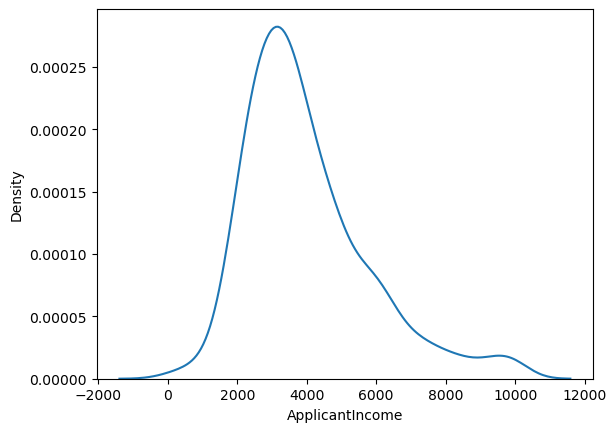

C:\Users\ADMIN\Documents\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


CoapplicantIncome


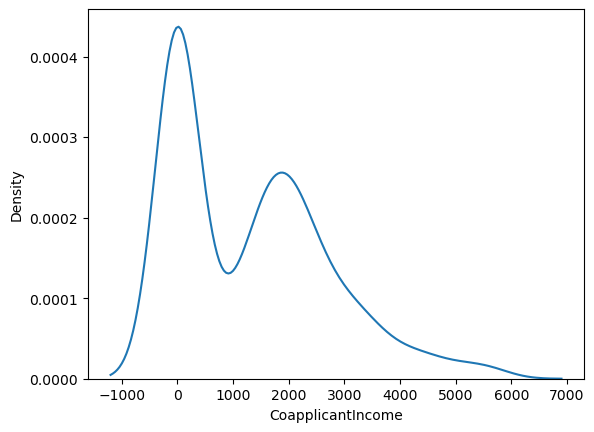

C:\Users\ADMIN\Documents\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


LoanAmount


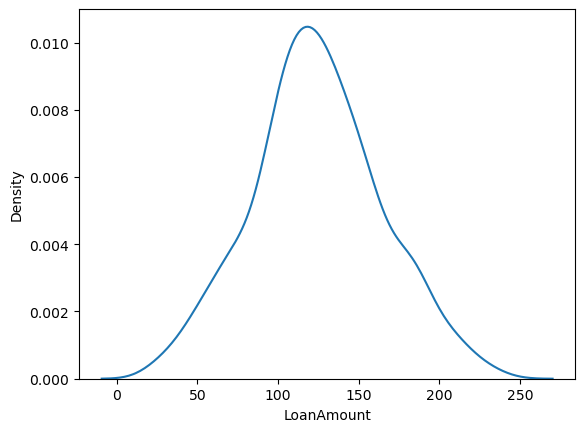

In [28]:
for i in numcol:
    print(i)
    sns.kdeplot(df[i])
    plt.show()

ApplicantIncome


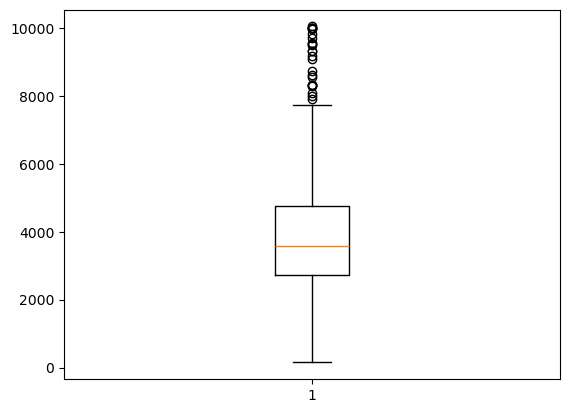

CoapplicantIncome


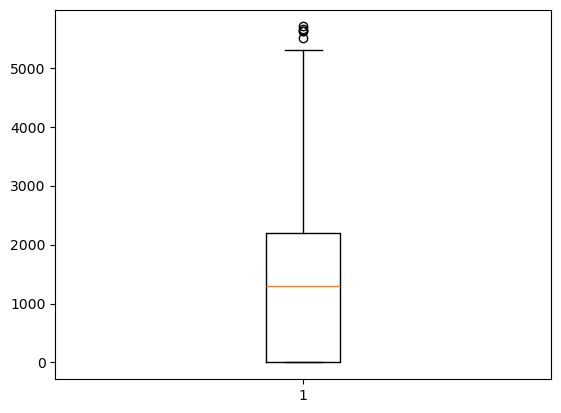

LoanAmount


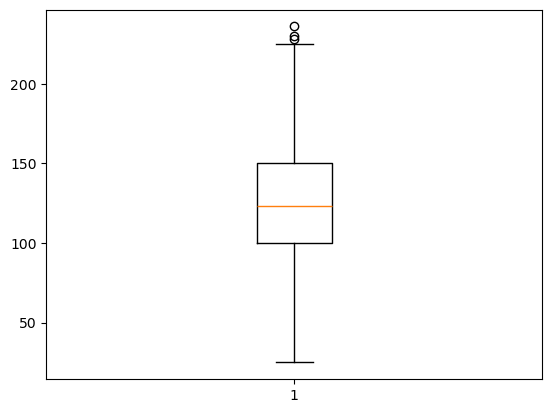

In [29]:
for i in numcol:
    print(i)
    plt.boxplot(df[i])
    plt.show()

In [30]:
df.reset_index(inplace=True,drop=True)

In [31]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
515,Male,Yes,0,Graduate,No,3232,1950.0,108.000000,360.0,1.0,Rural,Y
516,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
517,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
518,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [32]:
catcol

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status',
 'Credit_History',
 'Loan_Amount_Term']

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
le=LabelEncoder()

In [35]:
for i in catcol:
    df[i]=le.fit_transform(df[i])

In [36]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,8,1,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,8,1,0,0
2,1,1,0,0,1,3000,0.0,66.000000,8,1,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,8,1,2,1
4,1,0,0,0,0,6000,0.0,141.000000,8,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
515,1,1,0,0,0,3232,1950.0,108.000000,8,1,0,1
516,0,0,0,0,0,2900,0.0,71.000000,8,1,0,1
517,1,1,3,0,0,4106,0.0,40.000000,5,1,0,1
518,1,1,2,0,0,7583,0.0,187.000000,8,1,2,1


In [37]:
print("len is :",df.shape[0])
print((df["Loan_Status"].value_counts()[0]/df.shape[0])*100)
print((df["Loan_Status"].value_counts()[1]/df.shape[0])*100)

len is : 520
30.384615384615383
69.61538461538461


In [38]:
for i in catcol:
    print(i,":",df[i].unique())

Gender : [1 0]
Married : [0 1]
Dependents : [0 1 3 2]
Education : [0 1]
Self_Employed : [0 1]
Property_Area : [2 0 1]
Loan_Status : [1 0]
Credit_History : [1 0]
Loan_Amount_Term : [8 6 5 2 7 9 4 1 3 0]


In [39]:
x=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]

# How to handle Imbalance Dataset :- SMOTE

In [40]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
xx, yy=sm.fit_resample(x,y)
yy.value_counts()

ImportError: cannot import name 'parse_version' from 'sklearn.utils' (C:\Users\ADMIN\Documents\anaconda\Lib\site-packages\sklearn\utils\__init__.py)

In [ ]:
from sklearn.model_selection import train_test_split

In [41]:
xtrain,xtest,ytrain,ytest=train_test_split(xx,yy,
                                     train_size=0.7)

NameError: name 'train_test_split' is not defined

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [43]:
model= LogisticRegression()
model.fit(xtrain,ytrain)
y_pred=model.predict(xtest)
ac=accuracy_score(ytest,y_pred)
print(ac)

NameError: name 'xtrain' is not defined

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
model= KNeighborsClassifier(n_neighbors=5)
model.fit(xtrain,ytrain)
y_pred=model.predict(xtest)
ac=accuracy_score(ytest,y_pred)
print(ac)

NameError: name 'xtrain' is not defined

In [46]:
from sklearn.naive_bayes import GaussianNB

In [47]:
model=GaussianNB()
model.fit(xtrain,ytrain)
y_pred=model.predict(xtest)
ac=accuracy_score(ytest,y_pred)
print(ac)

NameError: name 'xtrain' is not defined

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
model= DecisionTreeClassifier()
model.fit(xtrain,ytrain)
y_pred=model.predict(xtest)
ac=accuracy_score(ytest,y_pred)
print(ac)

NameError: name 'xtrain' is not defined

In [50]:
model= DecisionTreeClassifier(criterion="entropy")
model.fit(xtrain,ytrain)
y_pred=model.predict(xtest)
ac=accuracy_score(ytest,y_pred)
print(ac)

NameError: name 'xtrain' is not defined

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
model= RandomForestClassifier(n_estimators=500)
model.fit(xtrain,ytrain)
y_pred=model.predict(xtest)
ac=accuracy_score(ytest,y_pred)
print(ac)

NameError: name 'xtrain' is not defined

# Final Model

In [53]:
model= LogisticRegression()
model.fit(xtrain,ytrain)
y_pred=model.predict(xtest)
ac=accuracy_score(ytest,y_pred)
print(ac)

NameError: name 'xtrain' is not defined

In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
cm=confusion_matrix(ytest,y_pred,)
cm

NameError: name 'ytest' is not defined

In [56]:
import seaborn as sns
sns.heatmap(cm, annot=True)

NameError: name 'cm' is not defined